In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define the path to the datas directory
data_dir = '/content/drive/MyDrive/ECG/datas/'

# Load the original CSV files
original_normal_data_path = f'{data_dir}ptbdb_normal.csv'
original_abnormal_data_path = f'{data_dir}ptbdb_abnormal.csv'

original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)

# Print the shape of the original data matrices
print("Original Normal Data Shape (rows, columns):", original_normal_data.shape)
print("Original Abnormal Data Shape (rows, columns):", original_abnormal_data.shape)


Original Normal Data Shape (rows, columns): (4046, 188)
Original Abnormal Data Shape (rows, columns): (10506, 188)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Define the path to the datas directory
data_dir = '/content/drive/MyDrive/ECG/datas/'

# Load the original CSV files
original_normal_data_path = f'{data_dir}ptbdb_normal.csv'
original_abnormal_data_path = f'{data_dir}ptbdb_abnormal.csv'

original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)

# Function to save data to an image
def save_data_to_image(data, filename):
    # Normalize data to 0-255 for saving as image
    normalized_data = (data - data.min().min()) / (data.max().max() - data.min().min()) * 255
    normalized_data = normalized_data.astype(np.uint8)
    plt.imsave(filename, normalized_data, cmap='gray')

# Save the normal and abnormal data as images
save_data_to_image(original_normal_data, 'normal_data_image.png')
save_data_to_image(original_abnormal_data, 'abnormal_data_image.png')

print("Data saved as normal_data_image.png and abnormal_data_image.png")


Data saved as normal_data_image.png and abnormal_data_image.png


In [ ]:
import cv2
import numpy as np
import pandas as pd

# Function to read image and convert to CSV-like structure
def read_image_to_csv(image_path, original_shape, output_csv_path, original_data):
    # Read image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Unable to read image {image_path}")
        return

    # Resize image back to original shape
    resized_img = cv2.resize(img, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_LINEAR)

    # Normalize the image values back to the original data range
    min_val = original_data.min().min()
    max_val = original_data.max().max()
    data = resized_img.astype(np.float64) / 255.0 * (max_val - min_val) + min_val

    # Save the data back to a CSV file
    pd.DataFrame(data).to_csv(output_csv_path, header=False, index=False)
    print(f"Data saved as {output_csv_path}")

    # Read the saved CSV file back into a DataFrame to print its shape
    reconstructed_data = pd.read_csv(output_csv_path, header=None)
    print(f"Shape of reconstructed data from {output_csv_path}: {reconstructed_data.shape[0]} rows, {reconstructed_data.shape[1]} columns")

# Assuming original_normal_data and original_abnormal_data are already defined
# Read images back and save to CSV
read_image_to_csv('normal_data_image.png', (4046, 188), '/content/reconstructed_normal_data.csv', original_normal_data)
read_image_to_csv('abnormal_data_image.png', (10506, 188), '/content/reconstructed_abnormal_data.csv', original_abnormal_data)

print("Images converted back to CSV files: reconstructed_normal_data.csv and reconstructed_abnormal_data.csv")


Data saved as /content/reconstructed_normal_data.csv
Shape of reconstructed data from /content/reconstructed_normal_data.csv: 4046 rows, 188 columns
Data saved as /content/reconstructed_abnormal_data.csv
Shape of reconstructed data from /content/reconstructed_abnormal_data.csv: 10506 rows, 188 columns
Images converted back to CSV files: reconstructed_normal_data.csv and reconstructed_abnormal_data.csv


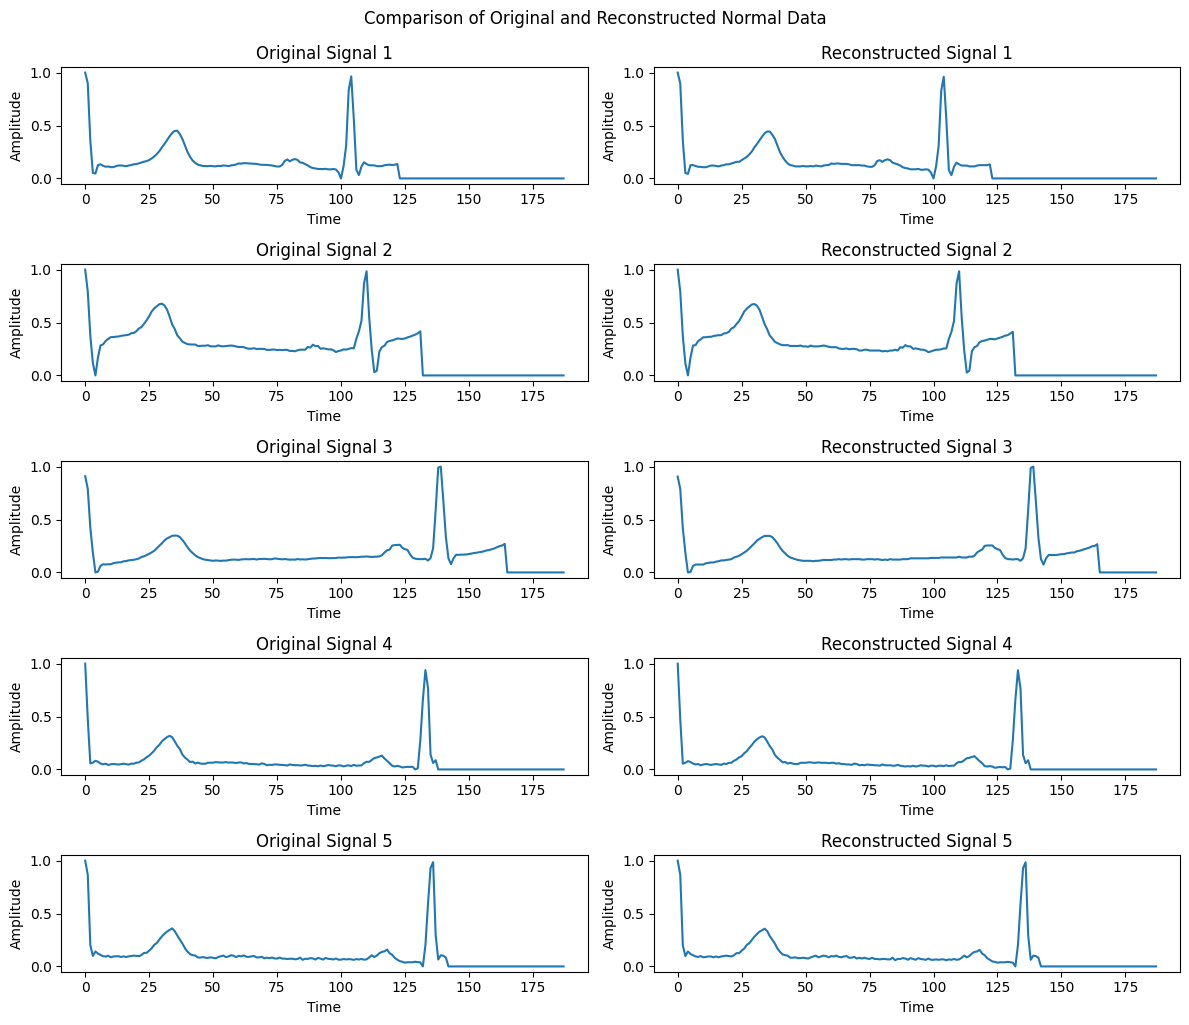

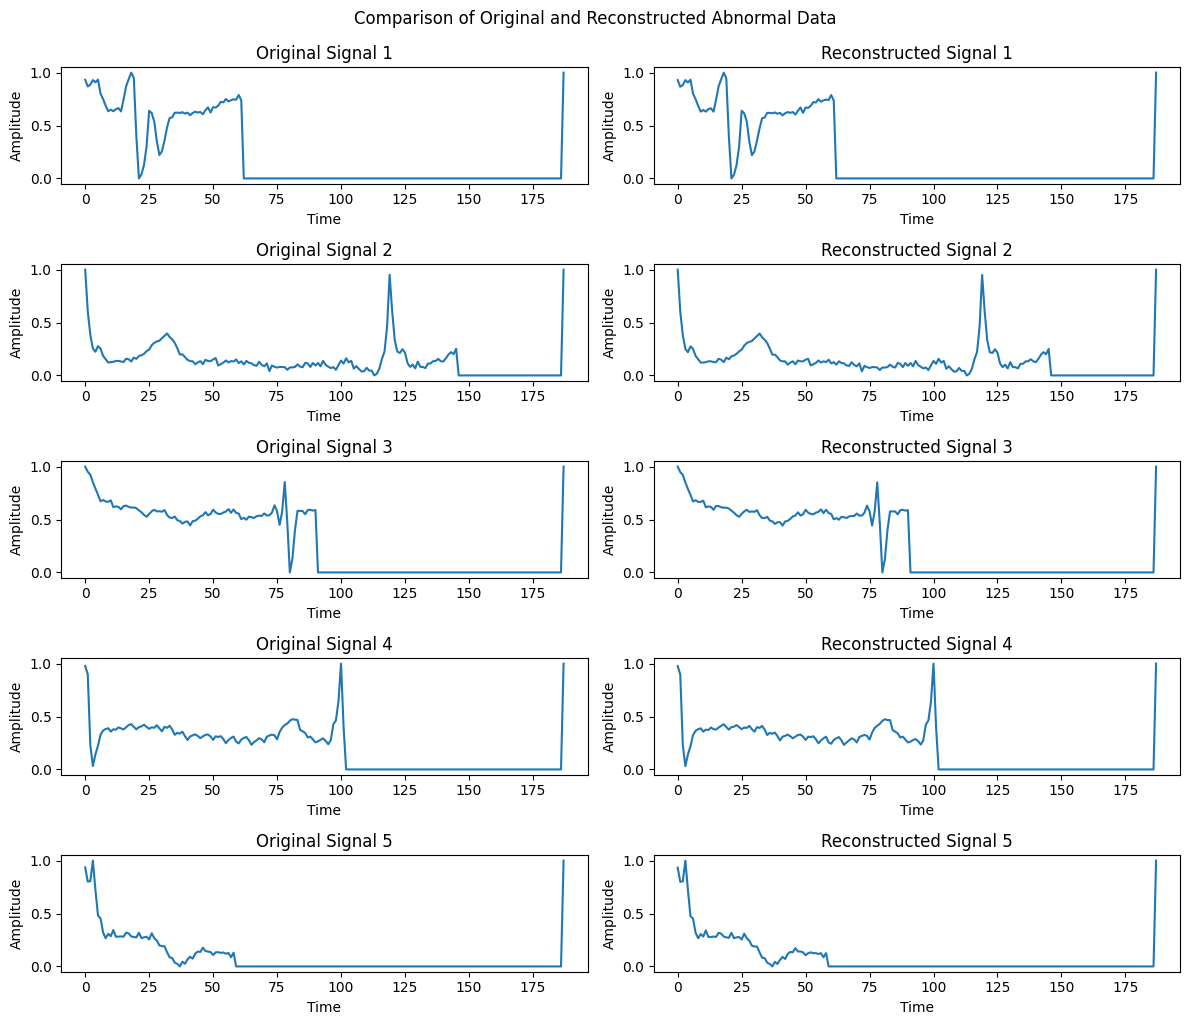

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison(original_data, reconstructed_data, num_signals=5, title='Comparison of Original and Reconstructed Data'):
    plt.figure(figsize=(12, num_signals * 2))

    for i in range(num_signals):
        plt.subplot(num_signals, 2, 2*i + 1)
        plt.plot(original_data.iloc[i])
        plt.title(f'Original Signal {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

        plt.subplot(num_signals, 2, 2*i + 2)
        plt.plot(reconstructed_data.iloc[i])
        plt.title(f'Reconstructed Signal {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Load the original and reconstructed CSV files
original_normal_data = pd.read_csv('/content/drive/MyDrive/ECG/datas/ptbdb_normal.csv', header=None)
original_abnormal_data = pd.read_csv('/content/drive/MyDrive/ECG/datas/ptbdb_abnormal.csv', header=None)
reconstructed_normal_data = pd.read_csv('/content/reconstructed_normal_data.csv', header=None)
reconstructed_abnormal_data = pd.read_csv('/content/reconstructed_abnormal_data.csv', header=None)

# Plot and compare the original and reconstructed data for normal and abnormal datasets
plot_comparison(original_normal_data, reconstructed_normal_data, num_signals=5, title='Comparison of Original and Reconstructed Normal Data')
plot_comparison(original_abnormal_data, reconstructed_abnormal_data, num_signals=5, title='Comparison of Original and Reconstructed Abnormal Data')


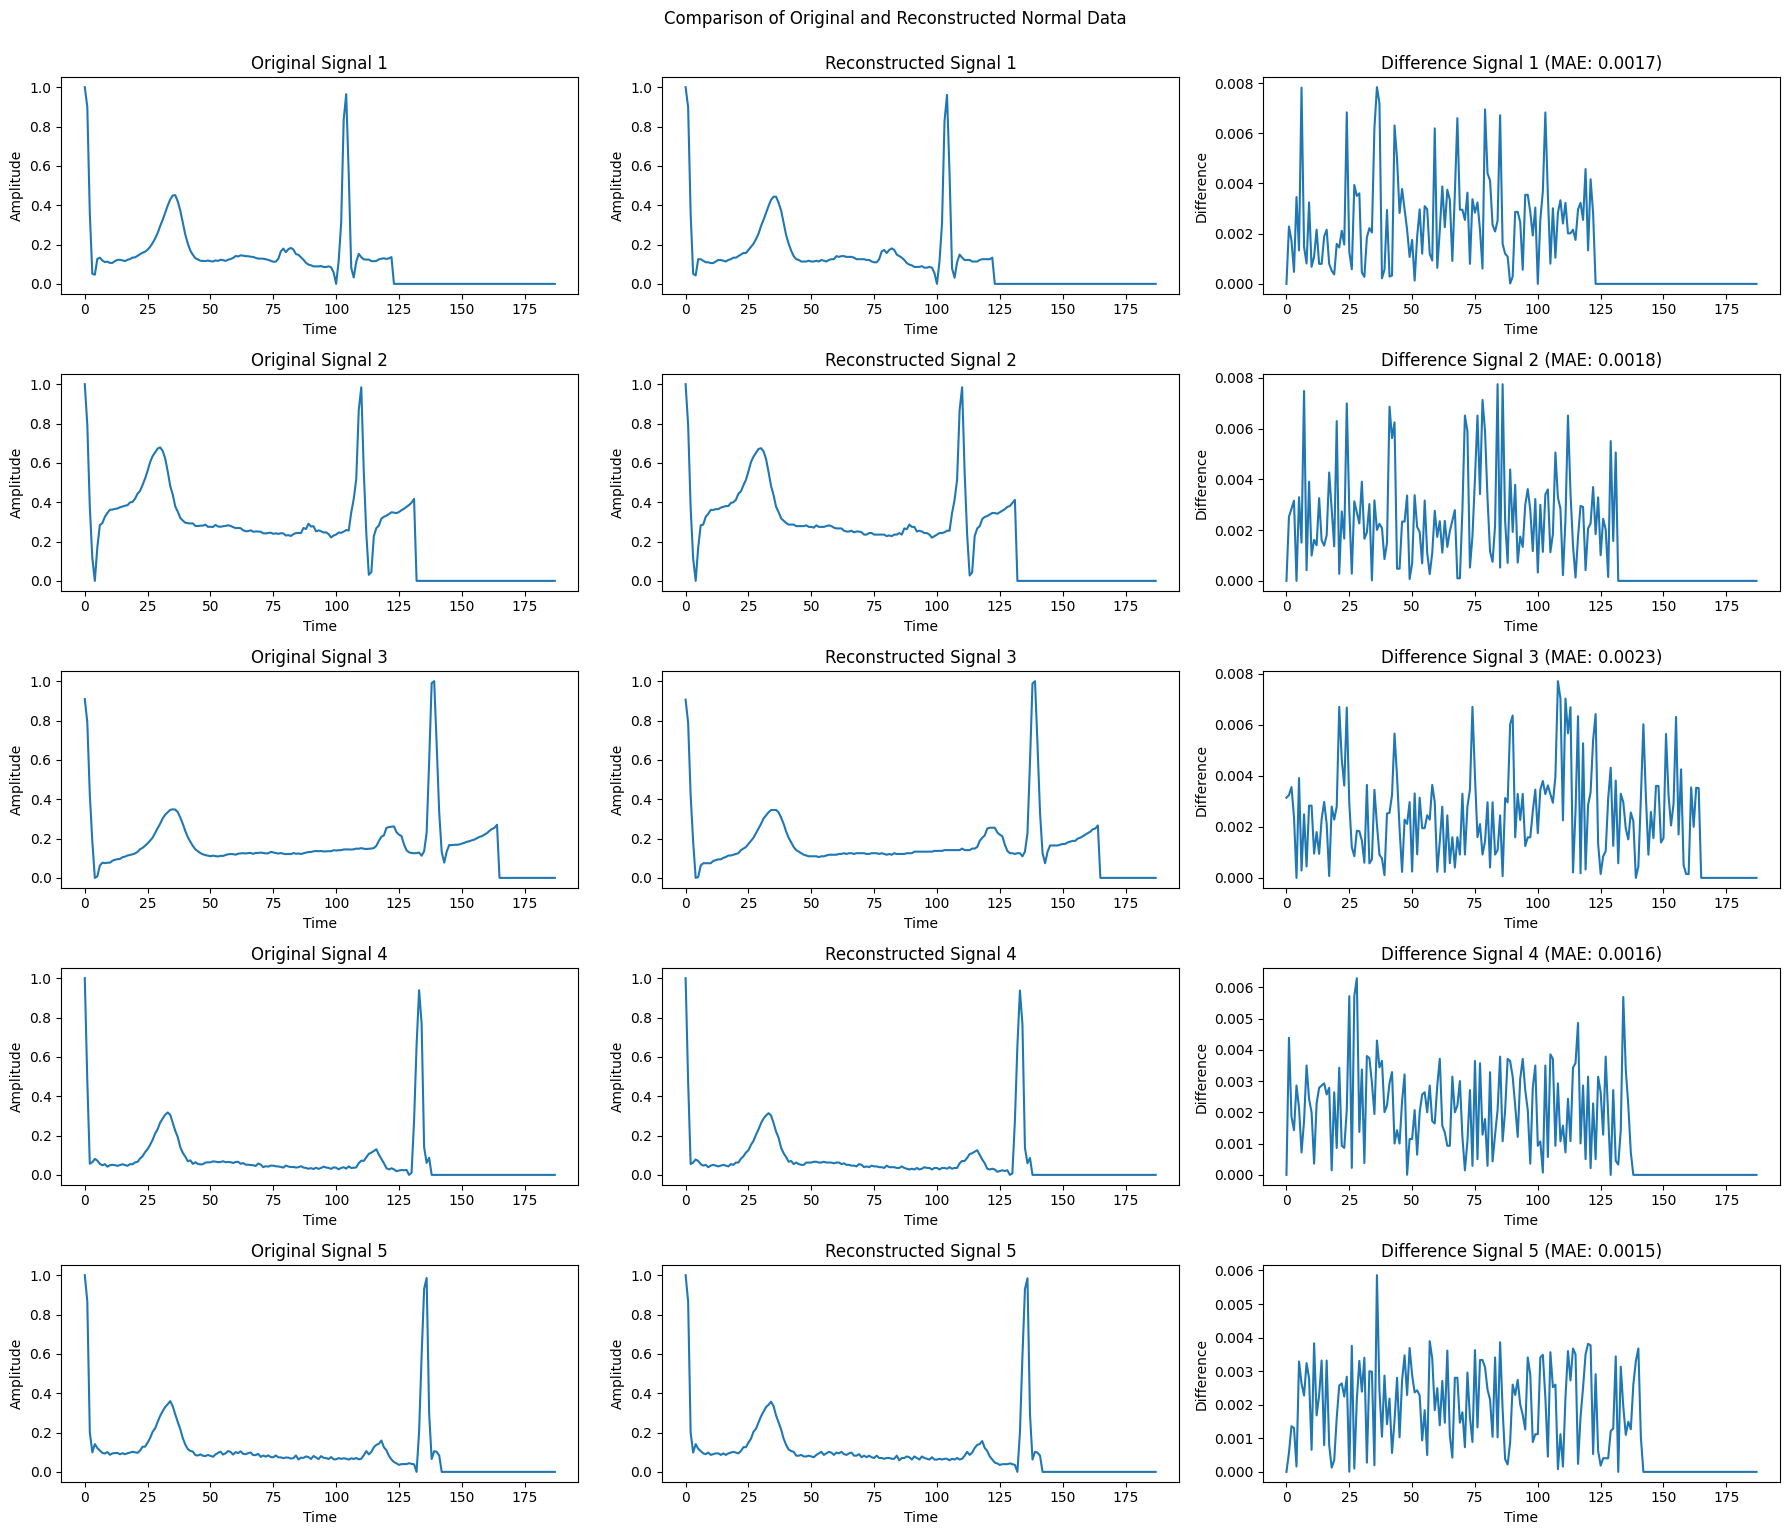

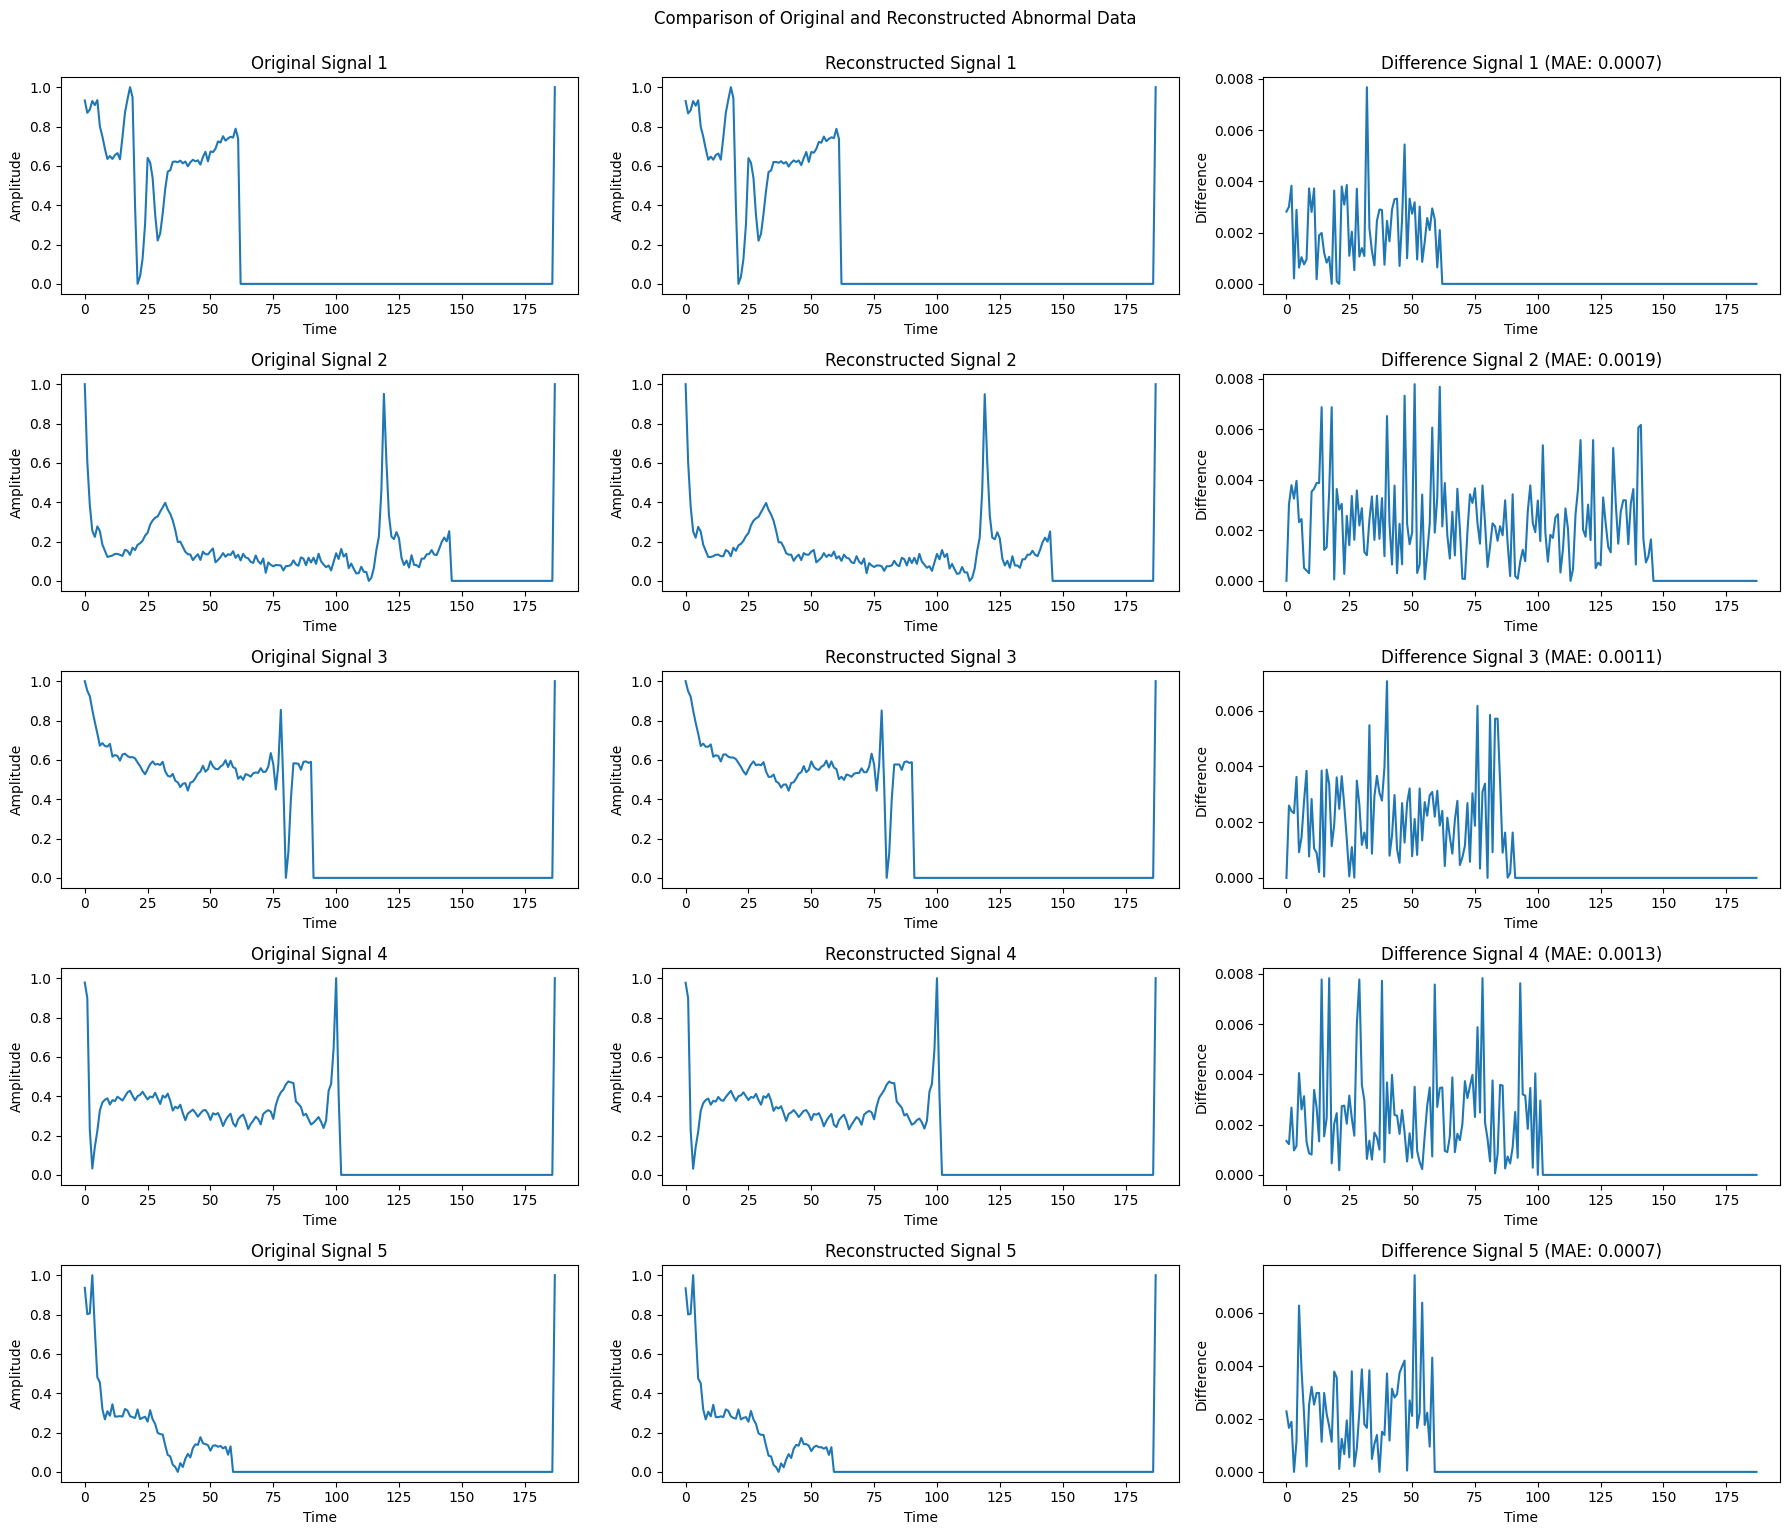

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def plot_comparison(original_data, reconstructed_data, num_signals=5, title='Comparison of Original and Reconstructed Data'):
    plt.figure(figsize=(18, num_signals * 3))

    for i in range(num_signals):
        # Original Signal
        plt.subplot(num_signals, 3, 3*i + 1)
        plt.plot(original_data.iloc[i])
        plt.title(f'Original Signal {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

        # Reconstructed Signal
        plt.subplot(num_signals, 3, 3*i + 2)
        plt.plot(reconstructed_data.iloc[i])
        plt.title(f'Reconstructed Signal {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

        # Difference Signal and MAE
        difference = original_data.iloc[i] - reconstructed_data.iloc[i]
        mae = mean_absolute_error(original_data.iloc[i], reconstructed_data.iloc[i])
        plt.subplot(num_signals, 3, 3*i + 3)
        plt.plot(difference)
        plt.title(f'Difference Signal {i+1} (MAE: {mae:.4f})')
        plt.xlabel('Time')
        plt.ylabel('Difference')

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Load the original and reconstructed CSV files
original_normal_data = pd.read_csv('/content/drive/MyDrive/ECG/datas/ptbdb_normal.csv', header=None)
original_abnormal_data = pd.read_csv('/content/drive/MyDrive/ECG/datas/ptbdb_abnormal.csv', header=None)
reconstructed_normal_data = pd.read_csv('/content/reconstructed_normal_data.csv', header=None)
reconstructed_abnormal_data = pd.read_csv('/content/reconstructed_abnormal_data.csv', header=None)

# Plot and compare the original and reconstructed data for normal and abnormal datasets
plot_comparison(original_normal_data, reconstructed_normal_data, num_signals=5, title='Comparison of Original and Reconstructed Normal Data')
plot_comparison(original_abnormal_data, reconstructed_abnormal_data, num_signals=5, title='Comparison of Original and Reconstructed Abnormal Data')


#Applying Normalization
Normalization for Saving Data to an Image:
def save_data_to_image(data, filename):
    # Normalize data to 0-255 for saving as image
    min_val = data.min().min()
    max_val = data.max().max()
    normalized_data = ((data - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    
    # Ensure data is a 2D numpy array
    normalized_data_np = normalized_data.to_numpy()
    if len(normalized_data_np.shape) == 2:
        cv2.imwrite(filename, normalized_data_np)
    else:
        print(f"Error: Data shape is not 2D. Shape: {normalized_data_np.shape}")
Normalization for Reading the Image and Converting Back to CSV:
def read_image_to_csv(image_path, original_shape, output_csv_path, original_data):
    # Read image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Unable to read image {image_path}")
        return

    # Resize image back to original shape
    resized_img = cv2.resize(img, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_LINEAR)

    # Normalize the image values back to the original data range
    min_val = original_data.min().min()
    max_val = original_data.max().max()
    data = resized_img.astype(np.float64) / 255.0 * (max_val - min_val) + min_val

    # Save the data back to a CSV file
    pd.DataFrame(data).to_csv(output_csv_path, header=False, index=False)
    print(f"Data saved as {output_csv_path}")

    # Read the saved CSV file back into a DataFrame to print its shape
    reconstructed_data = pd.read_csv(output_csv_path, header=None)
    print(f"Shape of reconstructed data from {output_csv_path}: {reconstructed_data.shape[0]} rows, {reconstructed_data.shape[1]} columns")


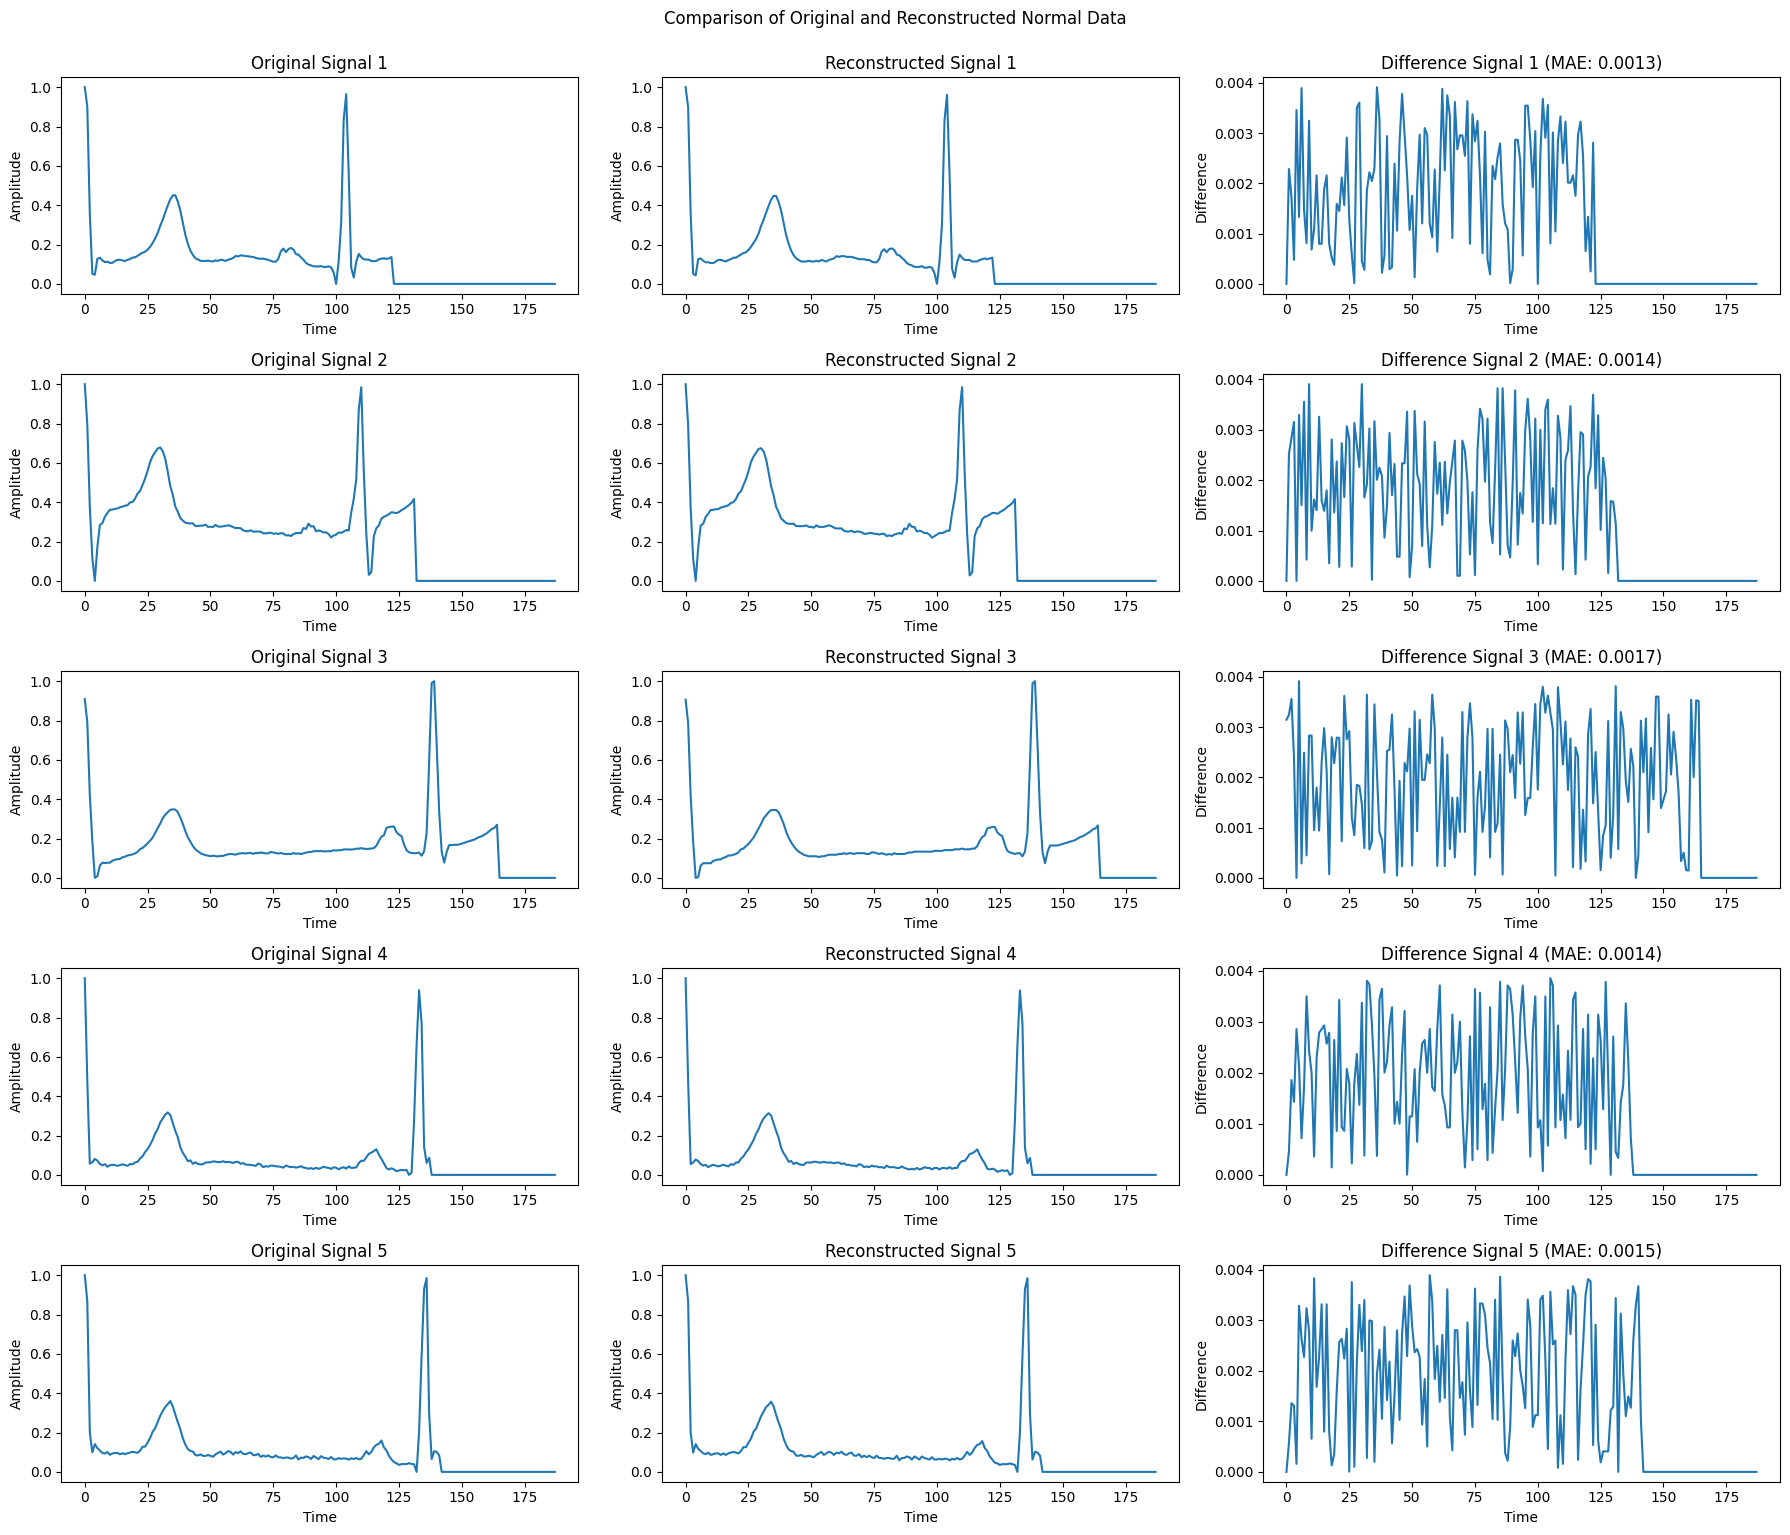

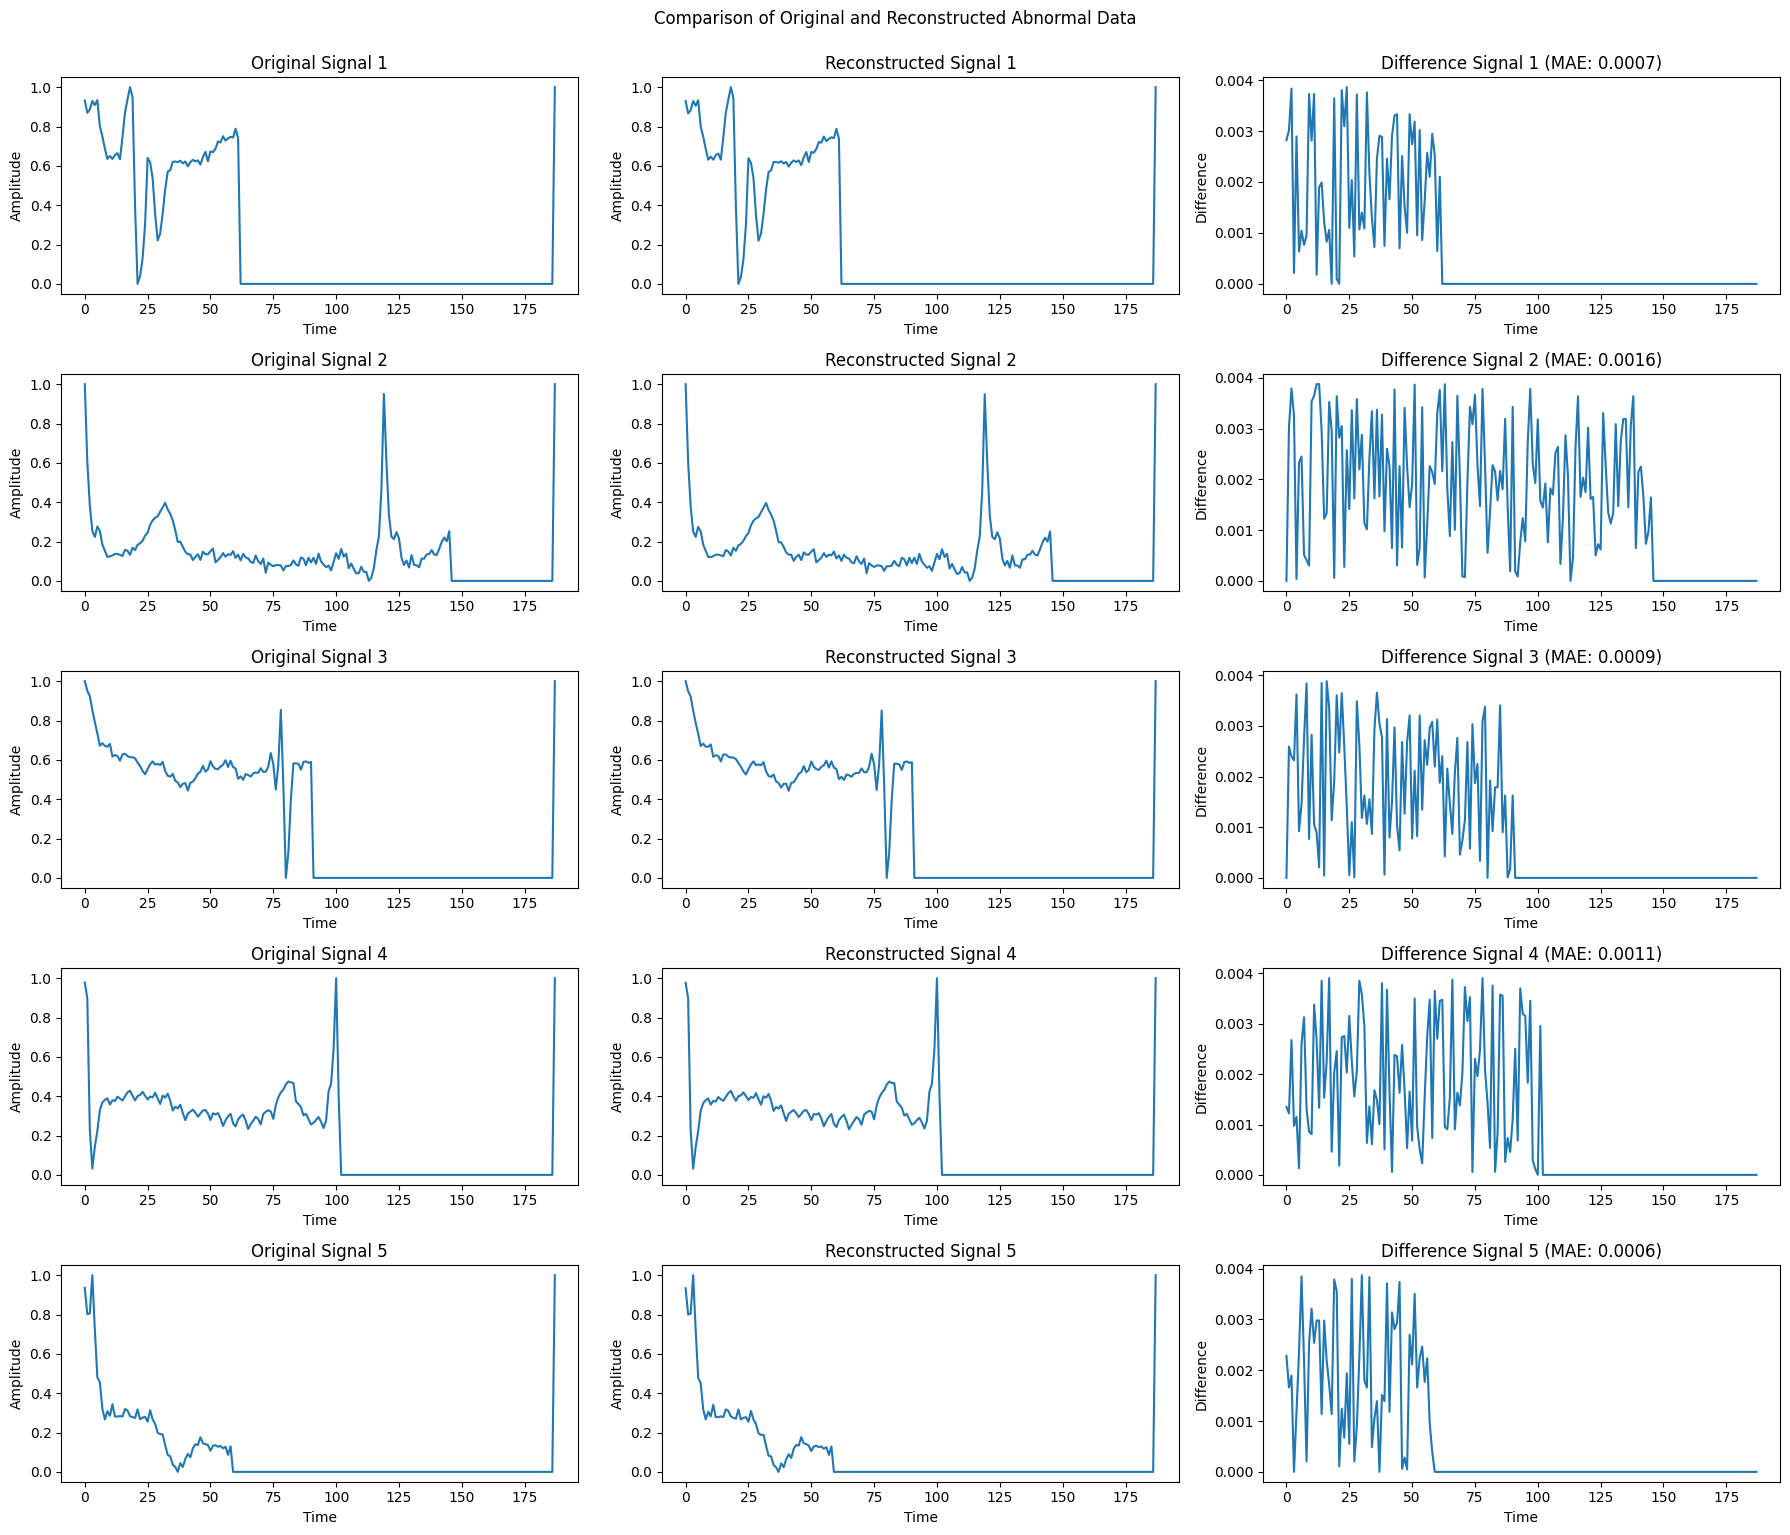

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from PIL import Image

def normalize_data(data):
    min_val = data.min().min()
    max_val = data.max().max()
    norm_data = (data - min_val) / (max_val - min_val) * 255
    return norm_data, min_val, max_val

def denormalize_data(norm_data, min_val, max_val):
    return norm_data / 255 * (max_val - min_val) + min_val

def save_as_image(data, filename):
    norm_data, min_val, max_val = normalize_data(data)
    norm_data = norm_data.to_numpy().astype(np.uint8)  # Convert DataFrame to NumPy array and cast to uint8
    image = Image.fromarray(norm_data)
    image.save(filename)
    return min_val, max_val

def read_image_and_convert_to_csv(image_path, min_val, max_val, output_csv):
    image = Image.open(image_path)
    norm_data = np.array(image)
    data = denormalize_data(norm_data, min_val, max_val)
    pd.DataFrame(data).to_csv(output_csv, header=None, index=False)

def plot_comparison(original_data, reconstructed_data, num_signals=5, title='Comparison of Original and Reconstructed Data'):
    plt.figure(figsize=(18, num_signals * 3))

    for i in range(num_signals):
        # Original Signal
        plt.subplot(num_signals, 3, 3*i + 1)
        plt.plot(original_data.iloc[i])
        plt.title(f'Original Signal {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

        # Reconstructed Signal
        plt.subplot(num_signals, 3, 3*i + 2)
        plt.plot(reconstructed_data.iloc[i])
        plt.title(f'Reconstructed Signal {i+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')

        # Difference Signal and MAE
        difference = original_data.iloc[i] - reconstructed_data.iloc[i]
        mae = mean_absolute_error(original_data.iloc[i], reconstructed_data.iloc[i])
        plt.subplot(num_signals, 3, 3*i + 3)
        plt.plot(difference)
        plt.title(f'Difference Signal {i+1} (MAE: {mae:.4f})')
        plt.xlabel('Time')
        plt.ylabel('Difference')

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Load the original CSV files
original_normal_data = pd.read_csv('/content/drive/MyDrive/ECG/datas/ptbdb_normal.csv', header=None)
original_abnormal_data = pd.read_csv('/content/drive/MyDrive/ECG/datas/ptbdb_abnormal.csv', header=None)

# Save normalized data as images
min_val_normal, max_val_normal = save_as_image(original_normal_data, 'normal_data_image.png')
min_val_abnormal, max_val_abnormal = save_as_image(original_abnormal_data, 'abnormal_data_image.png')

# Read the images and convert back to CSV
read_image_and_convert_to_csv('normal_data_image.png', min_val_normal, max_val_normal, 'reconstructed_normal_data.csv')
read_image_and_convert_to_csv('abnormal_data_image.png', min_val_abnormal, max_val_abnormal, 'reconstructed_abnormal_data.csv')

# Load the reconstructed CSV files
reconstructed_normal_data = pd.read_csv('/content/reconstructed_normal_data.csv', header=None)
reconstructed_abnormal_data = pd.read_csv('/content/reconstructed_abnormal_data.csv', header=None)

# Plot and compare the original and reconstructed data for normal and abnormal datasets
plot_comparison(original_normal_data, reconstructed_normal_data, num_signals=5, title='Comparison of Original and Reconstructed Normal Data')
plot_comparison(original_abnormal_data, reconstructed_abnormal_data, num_signals=5, title='Comparison of Original and Reconstructed Abnormal Data')
